In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
data = pd.read_csv("imdb-top-1000.csv")

In [231]:
data.shape

(1000, 10)

In [233]:
data.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
3,The Godfather: Part II,1974,202,Crime,9.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0,90.0
4,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000.0,96.0


In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Runtime        1000 non-null   int64  
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Director       1000 non-null   object 
 6   Star1          1000 non-null   object 
 7   No_of_Votes    1000 non-null   int64  
 8   Gross          1000 non-null   float64
 9   Metascore      843 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


In [235]:
data.Series_Title.head()

0    The Shawshank Redemption
1               The Godfather
2             The Dark Knight
3      The Godfather: Part II
4                12 Angry Men
Name: Series_Title, dtype: object

In [236]:
data.Runtime

0      142
1      175
2      152
3      202
4       96
      ... 
995    115
996    201
997    118
998     97
999     86
Name: Runtime, Length: 1000, dtype: int64

# we observed Release_Year is a object rather than int or date so we need to handle it!

In [239]:
data.Released_Year

0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
995    1961
996    1956
997    1953
998    1944
999    1935
Name: Released_Year, Length: 1000, dtype: object

In [243]:
# we have this column's type object so there must be some value here that won't be number. 
# if there's nan in data then type would have been float

In [244]:
data.Released_Year.unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [245]:
# ALl values are in string

In [247]:
data.Released_Year.astype('int')
# will give value error due PG

ValueError: invalid literal for int() with base 10: 'PG'

In [ ]:
int("3423")

In [ ]:
int("23n")

In [ ]:
data.Released_Year.value_counts()

In [250]:
# PG comes only once

In [251]:
data[data.Released_Year == 'PG']

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
966,Apollo 13,PG,140,Adventure,7.6,Ron Howard,Tom Hanks,269197,173837933.0,77.0


In [256]:
data[data['Released_Year'] == 'PG']

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
966,Apollo 13,PG,140,Adventure,7.6,Ron Howard,Tom Hanks,269197,173837933.0,77.0


In [257]:
data.loc[966:966]

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
966,Apollo 13,PG,140,Adventure,7.6,Ron Howard,Tom Hanks,269197,173837933.0,77.0


In [258]:
data.iloc[966:967] # will go till 966 bcz working on integer locations 

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
966,Apollo 13,PG,140,Adventure,7.6,Ron Howard,Tom Hanks,269197,173837933.0,77.0


In [259]:
data.loc[966:966, 'Released_Year'] 

966    PG
Name: Released_Year, dtype: object

In [260]:
data.iloc[966:967, 1:2] 

,Released_Year
966,PG


In [261]:
data.Released_Year.mode()

0    2014
Name: Released_Year, dtype: object

In [262]:
data.iloc[966:967, 1:2] = data.Released_Year.mode()[0] # after running no output so permenant change in data
# in case of bi mode or more modes, select 0th index

In [263]:
data[data['Released_Year'] == 'PG']

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore


In [264]:
data.Released_Year.unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943'], dtype=object)

In [265]:
data.Released_Year.astype(int)  # shows result means not updated in our data

0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
995    1961
996    1956
997    1953
998    1944
999    1935
Name: Released_Year, Length: 1000, dtype: int32

In [266]:
data["Released_Year"] = data.Released_Year.astype(int)

## Loc and iloc

### .loc[] → Label-Based Indexing
Uses labels (index names or column names) to select data.
Works with explicit row and column names.
Includes both start and end indices when slicing.

In [271]:
import pandas as pd

df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
}, index=['A', 'B', 'C'])

# Selecting a single row using index label
print(df.loc['A'])  

# Selecting multiple rows
print(df.loc[['A', 'C']])  

# Selecting rows and specific columns
print(df.loc['A', 'Age'])  # Returns Age of 'A'
print(df.loc[['A', 'B'], ['Name', 'Age']])  # Returns a subset


Name    Alice
Age        25
Name: A, dtype: object
      Name  Age
A    Alice   25
C  Charlie   35
25
    Name  Age
A  Alice   25
B    Bob   30


### .iloc[] → Integer-Based Indexing
Uses integer positions (like Python lists).
Works with implicit row and column positions.
Excludes the last index when slicing (like Python lists).
Example:

In [278]:
# Selecting a single row by index position
print(df.iloc[0])  

# Selecting multiple rows
print(df.iloc[[0, 2]])  

# Selecting rows and specific columns by position
print(df.iloc[0, 1])  # Returns Age at first row
print(df.iloc[:, 1])  # Returns entire "Age" column
print(df.iloc[0:2, 0:2])  # Returns first two rows, both columns


Name    Alice
Age        25
Name: A, dtype: object
      Name  Age
A    Alice   25
C  Charlie   35
25
A    25
B    30
C    35
Name: Age, dtype: int64
    Name  Age
A  Alice   25
B    Bob   30


In [280]:
data

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
3,The Godfather: Part II,1974,202,Crime,9.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0,90.0
4,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000.0,96.0
...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115,Comedy,7.6,Blake Edwards,Audrey Hepburn,166544,679874270.0,76.0
996,Giant,1956,201,Drama,7.6,George Stevens,Elizabeth Taylor,34075,195217415.0,84.0
997,From Here to Eternity,1953,118,Drama,7.6,Fred Zinnemann,Burt Lancaster,43374,30500000.0,85.0
998,Lifeboat,1944,97,Drama,7.6,Alfred Hitchcock,Tallulah Bankhead,26471,852142728.0,78.0


## Select all record of the movies in 1974

In [286]:
data[data["Released_Year"]==1974]

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
3,The Godfather: Part II,1974,202,Crime,9.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0,90.0
283,Chinatown,1974,130,Drama,8.1,Roman Polanski,Jack Nicholson,294230,29000000.0,92.0
417,Young Frankenstein,1974,106,Comedy,8.0,Mel Brooks,Gene Wilder,143359,86300000.0,80.0
693,The Conversation,1974,113,Drama,7.8,Francis Ford Coppola,Gene Hackman,98611,4420000.0,85.0
847,The Taking of Pelham One Two Three,1974,104,Action,7.7,Joseph Sargent,Walter Matthau,26729,660264543.0,68.0
848,Blazing Saddles,1974,93,Comedy,7.7,Mel Brooks,Cleavon Little,125993,119500000.0,73.0


## Select all action movies in 1974

In [289]:
data[(data.Released_Year == 1974) & (data.Genre == "Action")]

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
847,The Taking of Pelham One Two Three,1974,104,Action,7.7,Joseph Sargent,Walter Matthau,26729,660264543.0,68.0


## Movies by Alfred Hitchcock 

In [293]:
data[data["Director"] == "Alfred Hitchcock"]

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
49,Psycho,1960,109,Horror,8.5,Alfred Hitchcock,Anthony Perkins,604211,32000000.0,97.0
81,Rear Window,1954,112,Mystery,8.4,Alfred Hitchcock,James Stewart,444074,36764313.0,100.0
118,North by Northwest,1959,136,Adventure,8.3,Alfred Hitchcock,Cary Grant,299198,13275000.0,98.0
119,Vertigo,1958,128,Mystery,8.3,Alfred Hitchcock,James Stewart,364368,3200000.0,100.0
187,Dial M for Murder,1954,105,Crime,8.2,Alfred Hitchcock,Ray Milland,158335,12562.0,75.0
312,Rebecca,1940,130,Drama,8.1,Alfred Hitchcock,Laurence Olivier,123942,4360000.0,86.0
450,Rope,1948,80,Crime,8.0,Alfred Hitchcock,James Stewart,129783,466149116.0,73.0
556,Strangers on a Train,1951,101,Crime,7.9,Alfred Hitchcock,Farley Granger,123341,7630000.0,88.0
559,Notorious,1946,102,Drama,7.9,Alfred Hitchcock,Cary Grant,92306,10464000.0,100.0
712,Shadow of a Doubt,1943,108,Film-Noir,7.8,Alfred Hitchcock,Teresa Wright,59556,123353292.0,94.0


## Movies by Alfred Hitchcock with rating more than 8

In [296]:
data[(data["Director"] == "Alfred Hitchcock") & (data["IMDB_Rating"] >= 8)]

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
49,Psycho,1960,109,Horror,8.5,Alfred Hitchcock,Anthony Perkins,604211,32000000.0,97.0
81,Rear Window,1954,112,Mystery,8.4,Alfred Hitchcock,James Stewart,444074,36764313.0,100.0
118,North by Northwest,1959,136,Adventure,8.3,Alfred Hitchcock,Cary Grant,299198,13275000.0,98.0
119,Vertigo,1958,128,Mystery,8.3,Alfred Hitchcock,James Stewart,364368,3200000.0,100.0
187,Dial M for Murder,1954,105,Crime,8.2,Alfred Hitchcock,Ray Milland,158335,12562.0,75.0
312,Rebecca,1940,130,Drama,8.1,Alfred Hitchcock,Laurence Olivier,123942,4360000.0,86.0
450,Rope,1948,80,Crime,8.0,Alfred Hitchcock,James Stewart,129783,466149116.0,73.0


In [297]:
data.No_of_Votes.max()

2343110

In [298]:
data[data.No_of_Votes==data.No_of_Votes.max()]

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0


In [300]:
data[data.No_of_Votes==data.No_of_Votes.max()]["Series_Title"]  # extracts series from the result

0    The Shawshank Redemption
Name: Series_Title, dtype: object

In [301]:
data[data.No_of_Votes==data.No_of_Votes.max()]["Series_Title"][0]  # doesn't want series just string

'The Shawshank Redemption'

## Average Rating of Crime Movies

In [304]:
data[data["Genre"] == "Crime"]

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
3,The Godfather: Part II,1974,202,Crime,9.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0,90.0
4,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000.0,96.0
6,Pulp Fiction,1994,154,Crime,8.9,Quentin Tarantino,John Travolta,1826188,107928762.0,94.0
22,Cidade de Deus,2002,130,Crime,8.6,Fernando Meirelles,Kátia Lund,699256,7563397.0,79.0
...,...,...,...,...,...,...,...,...,...,...
958,Funny Games,1997,108,Crime,7.6,Michael Haneke,Susanne Lothar,65058,217345863.0,69.0
960,Sleepers,1996,147,Crime,7.6,Barry Levinson,Robert De Niro,186734,49100000.0,49.0
974,The Godfather: Part III,1990,162,Crime,7.6,Francis Ford Coppola,Al Pacino,359809,66666062.0,60.0
980,Blood Simple,1984,99,Crime,7.6,Joel Coen,Ethan Coen,87745,2150000.0,82.0


In [305]:
data[data["Genre"] == "Crime"]["IMDB_Rating"] # got series

1      9.2
3      9.0
4      9.0
6      8.9
22     8.6
      ... 
958    7.6
960    7.6
974    7.6
980    7.6
999    7.6
Name: IMDB_Rating, Length: 107, dtype: float64

In [306]:
data[data["Genre"] == "Crime"]["IMDB_Rating"].mean()

8.016822429906542

In [312]:
data[(data["Genre"] == "Crime") | (data["Genre"] == "Action")] # got series

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
3,The Godfather: Part II,1974,202,Crime,9.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0,90.0
4,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000.0,96.0
5,The Lord of the Rings: The Return of the King,2003,201,Action,8.9,Peter Jackson,Elijah Wood,1642758,377845905.0,94.0
...,...,...,...,...,...,...,...,...,...,...
980,Blood Simple,1984,99,Crime,7.6,Joel Coen,Ethan Coen,87745,2150000.0,82.0
982,Mad Max 2,1981,96,Action,7.6,George Miller,Mel Gibson,166588,12465371.0,77.0
983,The Warriors,1979,92,Action,7.6,Walter Hill,Michael Beck,93878,22490039.0,65.0
985,Escape from Alcatraz,1979,112,Action,7.6,Don Siegel,Clint Eastwood,121731,43000000.0,76.0


In [313]:
data[(data["Genre"] == "Crime") | (data["Genre"] == "Action")].IMDB_Rating.mean()

7.975268817204302

In [314]:
data.Gross.min()

1305.0

In [315]:
data[data.Gross == data.Gross.min()]["Director"]  # series

630    Anders Thomas Jensen
Name: Director, dtype: object

In [316]:
data[data.Gross == data.Gross.min()]["Director"][630] # not ideal

'Anders Thomas Jensen'

In [317]:
data[data.Gross == data.Gross.min()]["Director"].values  # series.values  -->  gives array

array(['Anders Thomas Jensen'], dtype=object)

In [321]:
data[data.Gross == data.Gross.min()]["Director"].values[0] 

'Anders Thomas Jensen'

# Plotting

In [323]:
data.Genre.value_counts() 

Genre
Drama        289
Action       172
Comedy       155
Crime        107
Biography     88
Animation     82
Adventure     72
Mystery       12
Horror        11
Western        4
Film-Noir      3
Fantasy        2
Family         2
Thriller       1
Name: count, dtype: int64

# Why is it a Series?
A pandas Series is a one-dimensional labeled array, where:
The index (left side) contains labels (e.g., genre names: "Drama", "Action", etc.).
The values (right side) are the corresponding counts.
The last line (Name: count, dtype: int64) suggests that it has a name (count) and contains integer values.

<BarContainer object of 14 artists>

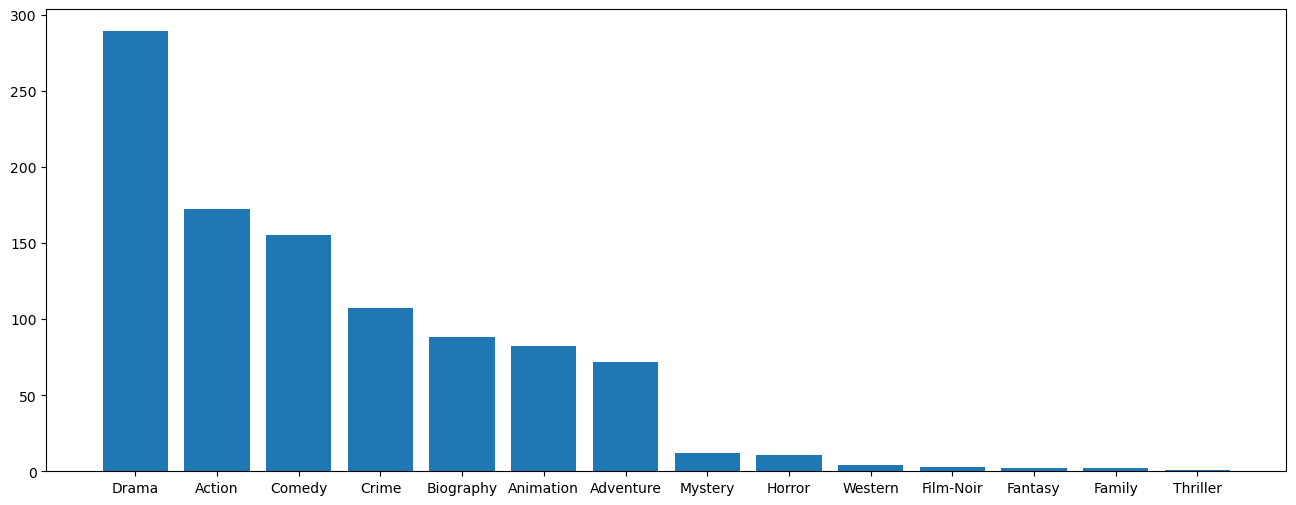

In [325]:
plt.figure(figsize = (16,6))
plt.bar(x=data.Genre.value_counts().index, height = data.Genre.value_counts().values)

In [336]:
data[data.Genre == "Action"]

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
5,The Lord of the Rings: The Return of the King,2003,201,Action,8.9,Peter Jackson,Elijah Wood,1642758,377845905.0,94.0
8,Inception,2010,148,Action,8.8,Christopher Nolan,Leonardo DiCaprio,2067042,292576195.0,74.0
10,The Lord of the Rings: The Fellowship of the Ring,2001,178,Action,8.8,Peter Jackson,Elijah Wood,1661481,315544750.0,92.0
13,The Lord of the Rings: The Two Towers,2002,179,Action,8.7,Peter Jackson,Elijah Wood,1485555,342551365.0,87.0
...,...,...,...,...,...,...,...,...,...,...
968,Falling Down,1993,113,Action,7.6,Joel Schumacher,Michael Douglas,171640,40903593.0,56.0
979,Lethal Weapon,1987,109,Action,7.6,Richard Donner,Mel Gibson,236894,65207127.0,68.0
982,Mad Max 2,1981,96,Action,7.6,George Miller,Mel Gibson,166588,12465371.0,77.0
983,The Warriors,1979,92,Action,7.6,Walter Hill,Michael Beck,93878,22490039.0,65.0


In [338]:
data[data.Genre == "Action"].Gross

2      534858444.0
5      377845905.0
8      292576195.0
10     315544750.0
13     342551365.0
          ...     
968     40903593.0
979     65207127.0
982     12465371.0
983     22490039.0
985     43000000.0
Name: Gross, Length: 172, dtype: float64

In [340]:
data[data.Genre == "Action"].Gross.mean()

189722449.5

In [346]:
data.groupby('Genre')['Gross'].aggregate([min,max])

C:\Users\Tesla Laptops\AppData\Local\Temp\ipykernel_9456\2849588260.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  data.groupby('Genre')['Gross'].aggregate([min,max])
C:\Users\Tesla Laptops\AppData\Local\Temp\ipykernel_9456\2849588260.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  data.groupby('Genre')['Gross'].aggregate([min,max])


,min,max
Genre,,
Action,3296.0,936662225.0
Adventure,61001.0,874211619.0
Animation,128985.0,873839108.0
Biography,21877.0,753585104.0
Comedy,1305.0,886752933.0
Crime,6013.0,790482117.0
Drama,3600.0,924558264.0
Family,4000000.0,435110554.0
Fantasy,337574718.0,445151978.0
